# Ukranian Audio Digits Recognition

## Environment Setup

In [1]:
!pip install colabcode
from colabcode import ColabCode

  Obtaining dependency information for colabcode from https://files.pythonhosted.org/packages/4b/90/f635c37e8e87cb9df76873edd35068e7b10cd20ac0ba4d2392ae7f307fe9/colabcode-0.3.0-py3-none-any.whl.metadata
  Using cached colabcode-0.3.0-py3-none-any.whl.metadata (2.5 kB)
  Obtaining dependency information for pyngrok>=5.0.0 from https://files.pythonhosted.org/packages/46/b0/3376c735bcfd72d2a9abb2017df6502dc03f9712cf246319236dcf2a8a1a/pyngrok-7.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for nest-asyncio==1.4.3 from https://files.pythonhosted.org/packages/5c/33/10805a3359f56ac4f3b520e64b9d5e6a288d87be95777b8023c64cba60f1/nest_asyncio-1.4.3-py3-none-any.whl.metadata
  Using cached nest_asyncio-1.4.3-py3-none-any.whl.metadata (2.6 kB)
  Obtaining dependency information for uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl.metadata
  Using cached uvicorn-0.13.1-py

In [4]:
%%writefile requirements.txt

torch #pytorch
torchvision
matplotlib
numpy
tqdm
pandas
opencv-python #cv2
albumentations

Overwriting requirements.txt


In [5]:
!pip install -r requirements.txt

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/d4/47/1ccf9f62d2674d3ca3e95452c5f9dd114234d1535dec77c96528bf6a31fc/pandas-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached 

## Imports

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from misc.constants import CONST
from misc.setup import Initializer

## Project misc functions

In [ ]:
def count_paths(paths):
    count_woman = sum('woman' in path.lower() for path in paths)
    count_man = sum('man' in path.lower() and 'woman' not in path.lower() for path in paths)

    return count_woman, count_man

## Project Setup

In [2]:
initializer = Initializer(CONST.DATA_PATH)
initializer.initialize_project()

## Simple Data Analys

Our dataset contain recordings of digits from `0` to `1`. We implement this dataset by ourselves. In total we have 100 different men women voices with different age starting from `10` ending `60`. However the median and mode is about `20` years old. 

In [11]:
df = pd.read_csv(CONST.CSV_PATH)

print("Total amount of recordings: ", len(df))

Total amount of recordings:  879


In [12]:
df.head()

,file_name,label
0,/home/nickolay/ML/ukranian-spoken-digits/datas...,8
1,/home/nickolay/ML/ukranian-spoken-digits/datas...,0
2,/home/nickolay/ML/ukranian-spoken-digits/datas...,1
3,/home/nickolay/ML/ukranian-spoken-digits/datas...,2
4,/home/nickolay/ML/ukranian-spoken-digits/datas...,6


In [18]:
count_woman, count_man = count_paths(df['file_name'].tolist())

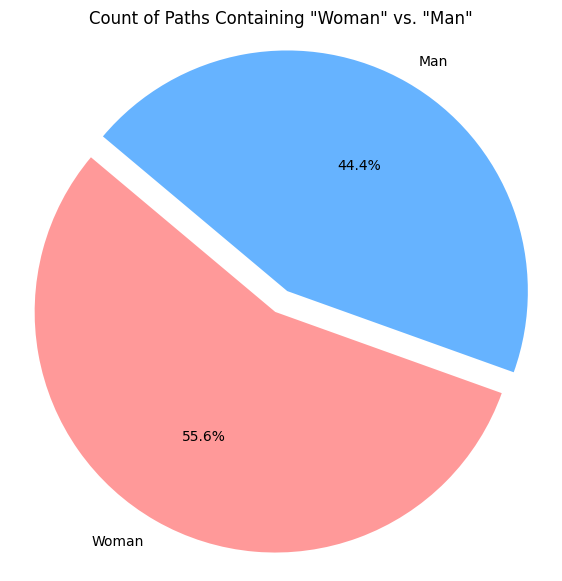

In [20]:
labels = ['Woman', 'Man']
sizes = [count_woman, count_man]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Count of Paths Containing "Woman" vs. "Man"')
plt.show()

## Data Processing